In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
import random as rd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#Menggabungkan Data

In [3]:
df_train = pd.read_csv("salju_train.csv")
df_test = pd.read_csv("salju_test.csv")

df_concat = [df_train, df_test]
df_salju = pd.concat(df_concat)

df_salju

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1.0,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,NaN,WSW,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,2.0,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,SW,WNW,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,3.0,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,SE,SE,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,4.0,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,N,SW,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5.0,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,NNW,ESE,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,NaN,14/11/2012,C40,7.8,25.8,0.0,8.0,13.2,NE,31.0,ENE,NW,22.0,13.0,59.0,21.0,1017.1,1014.2,6.0,1.0,16.8,24.0,No,No
18178,NaN,24/10/2015,C40,12.4,26.6,0.0,8.0,11.6,NW,37.0,NE,WNW,17.0,20.0,59.0,25.0,1022.2,1018.7,1.0,1.0,17.1,25.7,No,No
18179,NaN,31/08/2010,C21,6.7,22.9,0.0,NaN,NaN,NaN,NaN,NaN,NW,0.0,4.0,84.0,35.0,NaN,NaN,1.0,2.0,11.8,22.0,No,No
18180,NaN,24/08/2013,C12,12.5,26.7,0.0,9.0,10.8,NE,35.0,SW,ENE,2.0,26.0,56.0,45.0,1021.9,1018.1,5.0,5.0,22.9,25.4,No,No


#Eksplorasi dan Persiapan Data

In [4]:
df_salju.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61370 entries, 0 to 18181
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        43188 non-null  float64
 1   Tanggal                   61370 non-null  object 
 2   KodeLokasi                61370 non-null  object 
 3   SuhuMin                   60764 non-null  float64
 4   SuhuMax                   60850 non-null  float64
 5   Hujan                     60018 non-null  float64
 6   Penguapan                 34893 non-null  float64
 7   SinarMatahari             31925 non-null  float64
 8   ArahAnginTerkencang       57037 non-null  object 
 9   KecepatanAnginTerkencang  57057 non-null  float64
 10  ArahAngin9am              56952 non-null  object 
 11  ArahAngin3pm              59654 non-null  object 
 12  KecepatanAngin9am         60630 non-null  float64
 13  KecepatanAngin3pm         60112 non-null  float64
 14  Kelemb

In [5]:
df_salju.describe()

,id,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
count,43188.00000,60764.000000,60850.000000,60018.000000,34893.000000,31925.000000,57057.000000,60630.000000,60112.000000,60209.000000,59471.000000,54989.000000,55002.000000,37736.000000,36280.000000,60592.000000,59859.000000
mean,21594.50000,12.183021,23.231556,2.353434,5.471811,7.623211,40.054787,14.008906,18.667754,68.845389,51.497772,1017.645527,1015.251013,4.451611,4.508600,16.986467,21.695272
std,12467.44605,6.389140,7.115267,8.329652,4.185710,3.792375,13.605165,8.879758,8.829531,18.986311,20.740613,7.108807,7.032275,2.887097,2.719315,6.471851,6.928193
min,1.00000,-8.000000,-2.700000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,982.000000,980.200000,0.000000,0.000000,-7.000000,-4.000000
25%,10797.75000,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,21594.50000,12.000000,22.650000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,32391.25000,16.800000,28.200000,0.775000,7.400000,10.700000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.500000,26.400000
max,43188.00000,33.900000,48.100000,278.400000,145.000000,14.500000,135.000000,83.000000,83.000000,100.000000,100.000000,1040.600000,1038.400000,9.000000,8.000000,39.400000,46.100000


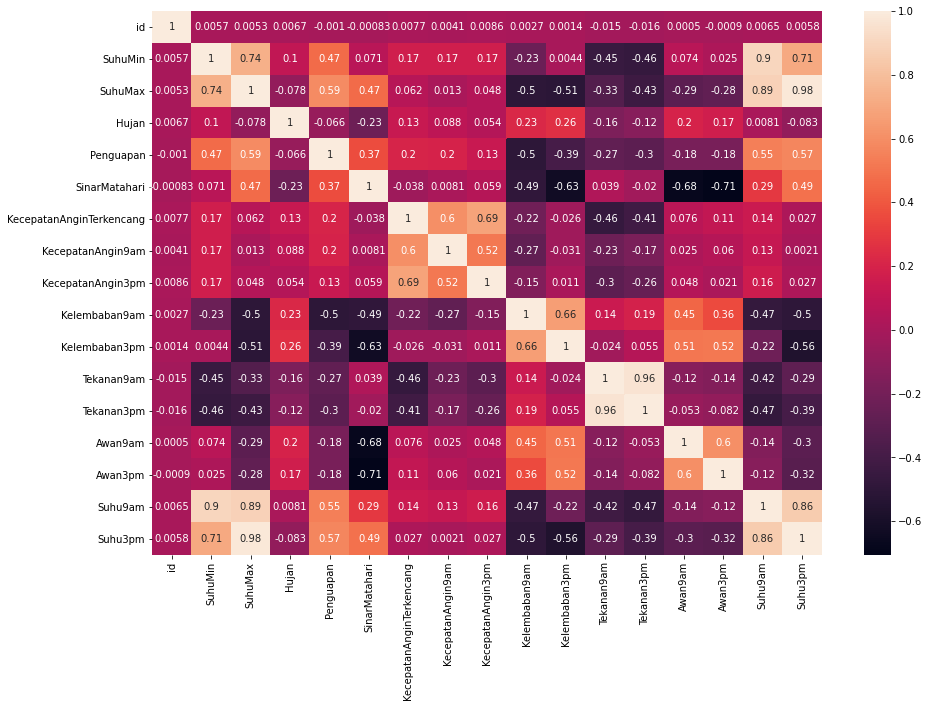

In [6]:
#Korelasi antar fitur
df_corr = df_salju.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr, annot=True, ax=ax)


*Catatan: suhumax dan kelembaban9am semakin tinggi suhumax semakin rendah kelembaban9am berdasarkan korelasi spearman dua variabel tersebut memiliki korelasi yang berbanding terbalik, nilai korelasinya yaitu -0,5.
Sehingga permasalahan yang dipilih adalah clustering data SuhuMax dan Kelembaban9am untuk mengelompokkan data yang memiliki karakteristik yang sama.


In [7]:
#Pengambilan kolom SuhuMax dan Kelembaban9am
df_cluster = df_salju.loc[:,["SuhuMax","Kelembaban9am"]]
df_cluster.info()
df_cluster = df_cluster.iloc[:10000]

#cek null pada data SuhuMax dan Kelembaban9am
missing_data = df_cluster.isnull()
for column in missing_data.columns.values.tolist():
  print(column)
  print (missing_data[column].value_counts())
  print("")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 61370 entries, 0 to 18181
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SuhuMax        60850 non-null  float64
 1   Kelembaban9am  60209 non-null  float64
dtypes: float64(2)
memory usage: 1.4 MB
SuhuMax
False    9921
True       79
Name: SuhuMax, dtype: int64

Kelembaban9am
False    9804
True      196
Name: Kelembaban9am, dtype: int64



In [24]:
#Drop nilai null

df_cluster.dropna(inplace=True)

missing_data = df_cluster.isnull()
for column in missing_data.columns.values.tolist():
  print(column)
  print (missing_data[column].value_counts())
  print("")


df_cluster.info()


SuhuMax
False    9778
Name: SuhuMax, dtype: int64

Kelembaban9am
False    9778
Name: Kelembaban9am, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9778 entries, 0 to 9998
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SuhuMax        9778 non-null   float64
 1   Kelembaban9am  9778 non-null   float64
dtypes: float64(2)
memory usage: 229.2 KB


In [25]:
#Menampilkan data
pd.set_option('max_rows', None)
df_cluster.reset_index()



,index,SuhuMax,Kelembaban9am
0,0,15.5,78.0
1,1,17.0,80.0
2,2,32.0,62.0
3,3,24.5,25.0
4,4,20.3,55.0
5,5,21.8,63.0
6,6,18.7,69.0
7,7,19.0,89.0
8,8,35.3,44.0
9,9,29.1,41.0


In [26]:

#Save  data
df_cluster.to_csv('1301184103_FIRLISA ANGGRAENI_DATA EKSPLORASI.csv', index=False, header=True)

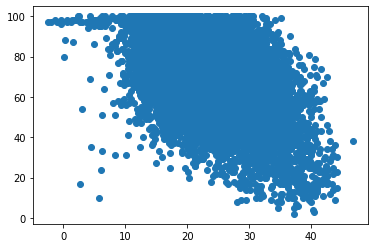

In [14]:
#plot untuk data yang akan digunakan
df_suhumax = df_cluster.SuhuMax.tolist()
df_kelembaban9am = df_cluster.Kelembaban9am.tolist()

list_cluster = []
for i in range(len(df_kelembaban9am)):
  list_cluster.append([df_suhumax[i],df_kelembaban9am[i]])

list_cluster = np.array(list_cluster)

plt.scatter(list_cluster[:,0], list_cluster[:,1] , cmap='viridis')

In [15]:
data = df_cluster.iloc[:].values
data.shape
m=data.shape[0] 
n=data.shape[1]

#Permodelan

In [16]:
def Kmeans(data, K, n_iter):
    #Menentukan centroid secara acak
    Centroids=np.array([]).reshape(n,0) 
    for i in range(K):
        rand=rd.randint(0,m-1)
        Centroids=np.c_[Centroids,data[rand]]
    
    Output={}
    
    #Menghitung jarak setiap data ke semua centroid #1
    euclid=np.array([]).reshape(m,0)
    for k in range(K):
        tempJarak=np.sum((data-Centroids[:,k])**2,axis=1)
        euclid=np.c_[euclid,tempJarak]
    C=np.argmin(euclid,axis=1)+1
    
    #Mengelompokkan data kembali bedasarkan index cluster C dan disimpan di Output #2.1
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0)
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],data[i]]
         
    for k in range(K):
        Y[k+1]=Y[k+1].T
    
    #Menghitung mean dan menentukan posisi centroid yang baru dengan nilai mean tersebut #2.2
    for k in range(K):
         Centroids[:,k]=np.mean(Y[k+1],axis=0)
    
    #melakukan proses #1 dan #2 sebanyak n kali untuk mencapai centroid yang konvergen
    for i in range(n_iter):
         
          euclid=np.array([]).reshape(m,0)
          for k in range(K):
              tempJarak=np.sum((data-Centroids[:,k])**2,axis=1)
              euclid=np.c_[euclid,tempJarak]
          C=np.argmin(euclid,axis=1)+1
         
          Y={}
          for k in range(K):
              Y[k+1]=np.array([]).reshape(2,0)
          for i in range(m):
              Y[C[i]]=np.c_[Y[C[i]],data[i]]
         
          for k in range(K):
              Y[k+1]=Y[k+1].T
        
          for k in range(K):
              Centroids[:,k]=np.mean(Y[k+1],axis=0)
          Output=Y
        
    return Output, Centroids

#Evaluasi

In [17]:
#Elbow method
n_iterasi = 100
WCSS_array=np.array([])
for K in range(1,7):
    Hasil_cluster,Centroids=Kmeans(data,K, n_iterasi)
    wcss=0
    Centroids = Centroids.T
    for k in range(K):
        wcss+=np.sum((Hasil_cluster[k+1]-Centroids[k,:])**2)
    WCSS_array=np.append(WCSS_array,wcss)

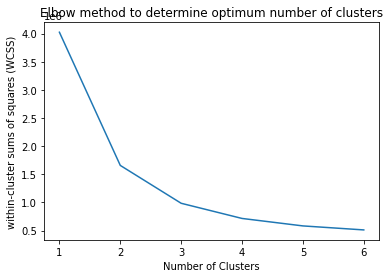

In [18]:
K_array=np.arange(1,7,1)
plt.plot(K_array,WCSS_array)
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters')
plt.show()

#Eksperimen


In [19]:
K = 3
n_iterasi = 100

Hasil_cluster, Centroids = Kmeans(data, K, n_iterasi)

#Menampilkan centroid
Centroids

array([[29.02098361, 23.84300956, 19.50121774],
       [39.63661202, 65.26872638, 88.33980864]])

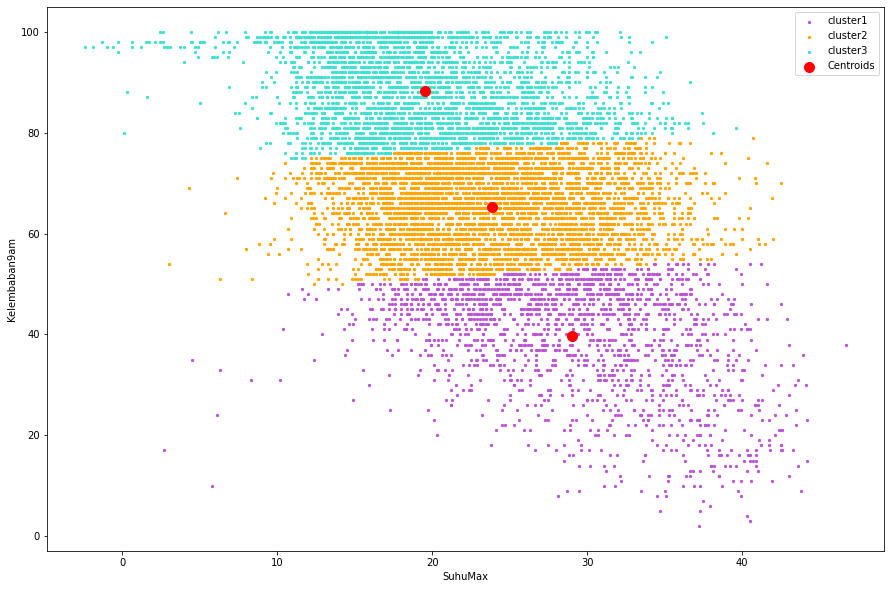

In [20]:
#Plot setelah data di cluster

color=["mediumorchid","orange","turquoise"]
labels=['cluster1','cluster2',"cluster3"]
fig, ax = plt.subplots(figsize=(15,10))
for k in range(K):
  plt.scatter(Hasil_cluster[k+1][:,0],Hasil_cluster[k+1][:,1],c=color[k],label=labels[k],s=5)
plt.scatter(Centroids[0,:],Centroids[1,:],s=100,c='red',label='Centroids')
plt.xlabel('SuhuMax')
plt.ylabel('Kelembaban9am')
plt.legend()
plt.show()

In [21]:
#Eksperimen sesuai eval
K = 2
Hasil_cluster, Centroids = Kmeans(data, K, n_iterasi)

In [22]:
#Menampilkan centroid
Centroids


array([[20.73355755, 26.36055129],
       [82.52765321, 51.77925892]])

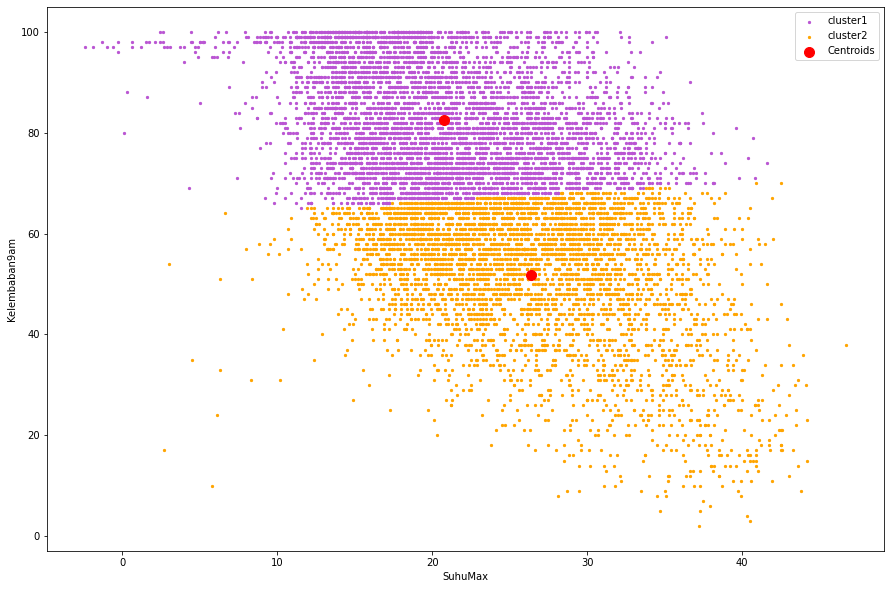

In [23]:
#Plot setelah data di cluster

color=["mediumorchid","orange"]
labels=['cluster1','cluster2']
fig, ax = plt.subplots(figsize=(15,10))
for k in range(K):
  plt.scatter(Hasil_cluster[k+1][:,0],Hasil_cluster[k+1][:,1],c=color[k],label=labels[k],s=5)
plt.scatter(Centroids[0,:],Centroids[1,:],s=100,c='red',label='Centroids')
plt.xlabel('SuhuMax')
plt.ylabel('Kelembaban9am')
plt.legend()
plt.show()